# UMAP

In [7]:
import sys
import seaborn as sns
import pandas as pd 
import numpy as np
from itertools import combinations
from scipy.spatial.distance import squareform, pdist
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import torch
import anndata as ad
import scanpy as sc
import os
import gc
from importlib import reload
print("C1")

from datasets import Dataset, load_from_disk
from datasets import load_dataset
from geneformer import EmbExtractor

from sklearn.cluster import KMeans
print("C2")

#classifer tools
import xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
print("C3")

sns.set_style('white')
torch.cuda.empty_cache()

import os

from datasets import Dataset, load_from_disk, load_dataset
import geneformer

from datetime import datetime
print("C4")
DEFAULT_NAME_PATH = "/nfs/turbo/umms-indikar/shared/projects/geneformer/geneformer/gene_name_id_dict.pkl"
DEFAULT_TOKEN_PATH = "/nfs/turbo/umms-indikar/shared/projects/geneformer/token_dictionary.pkl"
DEFAULT_MEDIAN_PATH = "/nfs/turbo/umms-indikar/shared/projects/geneformer/geneformer/gene_median_dictionary.pkl"

sns.set_style('white')
torch.cuda.empty_cache()
print("C5")

C1
C2
C3
C4
C5


# Importing the anndata files. 

In [ ]:
## Iniitla cells
# Just pick from a random file where they were copied (the first half ish of them have them still in original). Then filter by type

harvest_file_path = '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/originals/2024-07-31_03-49-01_job_number_22.h5ad'
harvest_file_adata = ad.read_h5ad(harvest_file_path)
initial_adata = harvest_file_adata[harvest_file_adata.obs['type'] == 'initial']


# get adata up and working
# Ensure hsc_adata is already defined and populated with data

# 1. Check the contents of the original obs
print("Original obs contents:")
print(initial_adata.obs.head())

# 2. Create the backup
initial_adata.uns['obs_backup'] = initial_adata.obs.copy()

# 3. Verify the backup was created correctly
print("Contents of obs_backup after creation:")
print(initial_adata.uns['obs_backup'].head())

# 4. Clear the original obs
initial_adata.obs = pd.DataFrame(index=initial_adata.obs.index)

# 5. Check the contents of the cleared obs and the backup
print("Contents of cleared obs:")
print(initial_adata.obs.head())

print("Contents of obs_backup after clearing original obs:")
print(initial_adata.uns['obs_backup'].head())



#initial_adata.obs['kmeans_cluster'] = initial_kmeans.labels_
initial_adata.obs['recipe_name'] = np.nan
initial_adata.obs['recipe_number'] = np.nan
initial_adata.obs['cell_id'] = initial_adata.uns['obs_backup']['cell_id']
initial_adata.obs['type'] = 'initial'



initial_adata.obs.sample(10)



# ISP Cells

In [57]:
# file = '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/originals/' + '2024-07-31_03-17-04_job_number_12.h5ad'
# reprog_centroid_adata_wid = ad.read_h5ad(reprog_wid_path)
# # this is not actually written into the file idk if we care? 
# reprog_centroid_adata_wid.obs['type'] = 'reprogrammed'
# reprog_centroid_adata_wid.obs['cluster_number'] = range(1, len(reprog_centroid_adata_wid.obs) + 1)
# kmeans = KMeans(n_clusters=10, random_state=0)

# # Fit KMeans to the DataFrame (make sure to use the feature columns only)
# reprog_centroid_adata['kmeans'] = kmeans.fit_predict(reprog_centroid_adata)

# reprog_centroid_adata_wid.obs.sample(10)


In [58]:
# from itertools import combinations
# import pandas as pd
# import anndata as ad
# import numpy as np
# from sklearn.cluster import KMeans

# # Initialize an empty AnnData object (This will be replaced by actual data)
# reprog_centroid_adata = ad.AnnData()

# all_cluster_labels = []
# all_cell_id_labels = []
# all_recipe_name_labels = []
# all_recipe_num_labels = []

# def ten_choose_five():
#     gene_list = [
#         'GATA2', 
#         'GFI1B', 
#         'FOS', 
#         'STAT5A',
#         'REL',
#         'FOSB',
#         'IKZF1',
#         'RUNX3',
#         'MEF2C',
#         'ETV6',
#     ]
#     len_sublist = 5
#     sublists = list(combinations(gene_list, len_sublist))
    
#     df = pd.DataFrame({
#         'recipe_iteration': range(1, len(sublists) + 1),
#         'recipe_list': [list(sublist) for sublist in sublists]
#     })
#     return df

# pert_df = ten_choose_five()
# pert_df['recipe_list'] = pert_df['recipe_list'].apply(lambda x: ';'.join(x))
# pert_dict = pert_df.set_index('recipe_list')['recipe_iteration'].to_dict()

# print("Going to read in ")
# print(file)
# one_recipe_adata = ad.read_h5ad(file)
# print(one_recipe_adata.obs.columns)

# one_recipe_adata = one_recipe_adata[one_recipe_adata.obs['type'] == 'reprogrammed']

# # Perform k-means clustering
# kmeans = KMeans(n_clusters=10, random_state=0).fit(one_recipe_adata.X)
# one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_

# # Collect data for the AnnData object
# all_cell_id_labels = one_recipe_adata.obs['cell_id'].tolist()
# all_cluster_labels = one_recipe_adata.obs['kmeans_clusters'].tolist()

# recipe_names_this_file = one_recipe_adata.obs['recipe'].unique()
# if len(recipe_names_this_file) == 1:
#     recipe_as_string = recipe_names_this_file[0]
#     recipe_as_list = recipe_as_string.split(';')
#     print(f'The unique value is: {recipe_as_list}')
#     recipe_num = pert_dict[recipe_as_string]
#     print(recipe_num)
# else:
#     print('Error: There are multiple unique values or no values in the column.')

# # Prepare the AnnData object with all cells
# reprog_centroid_adata = ad.AnnData(X=one_recipe_adata.X)
# reprog_centroid_adata.obs['kmeans_cluster'] = all_cluster_labels
# reprog_centroid_adata.obs['cell_id'] = all_cell_id_labels
# reprog_centroid_adata.obs['recipe_name'] = [recipe_as_string] * len(all_cluster_labels)
# reprog_centroid_adata.obs['recipe_number'] = [recipe_num] * len(all_cluster_labels)

# print("All cell data and kmeans_cluster values have been added to reprog_centroid_adata.")
# print(reprog_centroid_adata.obs.head(12))


In [59]:
# from itertools import combinations
# import pandas as pd
# import anndata as ad
# import numpy as np
# from sklearn.cluster import KMeans
# import os

# def ten_choose_five():
#     gene_list = [
#         'GATA2', 
#         'GFI1B', 
#         'FOS', 
#         'STAT5A',
#         'REL',
#         'FOSB',
#         'IKZF1',
#         'RUNX3',
#         'MEF2C',
#         'ETV6',
#     ]
#     len_sublist = 5
#     sublists = list(combinations(gene_list, len_sublist))
    
#     df = pd.DataFrame({
#         'recipe_iteration': range(1, len(sublists) + 1),
#         'recipe_list': [list(sublist) for sublist in sublists]
#     })
#     return df

# pert_df = ten_choose_five()
# pert_df['recipe_list'] = pert_df['recipe_list'].apply(lambda x: ';'.join(x))
# pert_dict = pert_df.set_index('recipe_list')['recipe_iteration'].to_dict()

# # List of files to process
# file_list = ['/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-03-23_job_number_89.h5ad','/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-01-47_job_number_88.h5ad']  # Replace with actual file names

# # Initialize a list to collect data
# all_data = []

# for file in file_list:
#     print("Going to read in ", file)
#     one_recipe_adata = ad.read_h5ad(file)
#     print(one_recipe_adata.obs.columns)

#     one_recipe_adata = one_recipe_adata[one_recipe_adata.obs['type'] == 'reprogrammed']

#     # Perform K-means clustering
#     kmeans = KMeans(n_clusters=10, random_state=0).fit(one_recipe_adata.X)
#     one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_

#     # Extract recipe number
#     recipe_names_this_file = one_recipe_adata.obs['recipe'].unique()
#     if len(recipe_names_this_file) == 1:
#         recipe_as_string = recipe_names_this_file[0]
#         recipe_num = pert_dict.get(recipe_as_string, None)
#         if recipe_num is None:
#             print(f"Recipe number not found for {recipe_as_string}")
#             continue
#     else:
#         print('Error: There are multiple unique values or no values in the column.')
#         continue

#     # Combine recipe number with kmeans cluster number
#     one_recipe_adata.obs['kmeans'] = one_recipe_adata.obs['kmeans_clusters'].apply(
#         lambda x: int(f"{recipe_num}{x}")
#     )

#     # Collect data
#     all_data.append(one_recipe_adata)

# # Concatenate all AnnData objects
# combined_adata = ad.concat(all_data, join='outer')

# print("Cluster counts:")
# combined_adata.obs.sample(20)

# # she works b"h


In [60]:
# ok here's where we have to be careful.  going back to an old version of the file to find where reprog_centroid_adata_wid was made, and if there's composite of the original cells. checking in turbo first


In [61]:
import os
import re

def list_reprogramming_jobs(directory, start_job_number, end_job_number):
    """
    List and sort files in the given directory by job number within the specified range.

    Parameters:
    directory (str): The directory containing the files.
    start_job_number (int): The starting job number.
    end_job_number (int): The ending job number.

    Returns:
    list: A sorted list of file names within the specified job number range.
    """
    # List all files in the directory
    files = os.listdir(directory)

    # Define a regex pattern to extract job numbers
    pattern = re.compile(r'_job_number_(\d+)\.h5ad$')

    # Create a list of tuples (job_number, file_name)
    files_with_job_numbers = []
    for file in files:
        match = pattern.search(file)
        if match:
            job_number = int(match.group(1))
            if start_job_number <= job_number <= end_job_number:
                files_with_job_numbers.append((job_number, file))

    # Sort files by job number
    files_with_job_numbers.sort(key=lambda x: x[0])

    # Extract sorted file names
    sorted_files = [file for _, file in files_with_job_numbers]

    return sorted_files



directory = '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/'
files_in_directory = list_reprogramming_jobs(directory, 1, 252)
files_in_directory = [os.path.join(directory,file) for file in files_in_directory]
files_in_directory

['/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-44_job_number_1.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-45_job_number_2.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-53_job_number_3.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-49_job_number_4.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-45-28_job_number_5.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-55_job_number_6.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-45-23_job_number_7.h5ad',
 '/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-57_job_number_8.h5ad',
 '/nfs/turbo/umm

In [62]:
from itertools import combinations
import pandas as pd
import anndata as ad
import numpy as np
from sklearn.cluster import KMeans
import os

def ten_choose_five():
    gene_list = [
        'GATA2', 
        'GFI1B', 
        'FOS', 
        'STAT5A',
        'REL',
        'FOSB',
        'IKZF1',
        'RUNX3',
        'MEF2C',
        'ETV6',
    ]
    len_sublist = 5
    sublists = list(combinations(gene_list, len_sublist))
    
    df = pd.DataFrame({
        'recipe_iteration': range(1, len(sublists) + 1),
        'recipe_list': [list(sublist) for sublist in sublists]
    })
    return df

pert_df = ten_choose_five()
pert_df['recipe_list'] = pert_df['recipe_list'].apply(lambda x: ';'.join(x))
pert_dict = pert_df.set_index('recipe_list')['recipe_iteration'].to_dict()

# List of files to process
  # Replace with actual file names

# Initialize a list to collect data
all_data = []

for file in files_in_directory:
    print("Going to read in ", file)
    one_recipe_adata = ad.read_h5ad(file)
    print(one_recipe_adata.obs.columns)

    one_recipe_adata = one_recipe_adata[one_recipe_adata.obs['type'] == 'reprogrammed']

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=10, random_state=0).fit(one_recipe_adata.X)
    one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_

    # Extract recipe number
    recipe_names_this_file = one_recipe_adata.obs['recipe'].unique()
    if len(recipe_names_this_file) == 1:
        recipe_as_string = recipe_names_this_file[0]
        recipe_num = pert_dict.get(recipe_as_string, None)
        if recipe_num is None:
            print(f"Recipe number not found for {recipe_as_string}")
            continue
    else:
        print('Error: There are multiple unique values or no values in the column.')
        continue

    # Combine recipe number with kmeans cluster number
    one_recipe_adata.obs['kmeans'] = one_recipe_adata.obs['kmeans_clusters'].apply(
        lambda x: int(f"{recipe_num}{x}")
    )

    # Collect data
    all_data.append(one_recipe_adata)

# Concatenate all AnnData objects
combined_adata = ad.concat(all_data, join='outer')

# she works b"h


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-44_job_number_1.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-45_job_number_2.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-53_job_number_3.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-49_job_number_4.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-45-28_job_number_5.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-55_job_number_6.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-45-23_job_number_7.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_02-44-57_job_number_8.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-16-56_job_number_9.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-16-48_job_number_10.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-16-43_job_number_11.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-17-04_job_number_12.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-16-52_job_number_13.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-16-44_job_number_14.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-17-52_job_number_15.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-18-00_job_number_16.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-27-40_job_number_17.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-31-58_job_number_18.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-48-31_job_number_19.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-48-37_job_number_20.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-48-37_job_number_21.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-49-01_job_number_22.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-49-07_job_number_23.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-49-44_job_number_24.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-50-17_job_number_25.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-50-52_job_number_26.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-51-51_job_number_27.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_03-56-06_job_number_28.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-21-03_job_number_29.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-21-21_job_number_30.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-21-34_job_number_31.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-21-41_job_number_32.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-21-34_job_number_33.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-22-21_job_number_34.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-23-32_job_number_35.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-24-16_job_number_36.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-16-31_job_number_37.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-20-20_job_number_38.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-40-49_job_number_39.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-44-24_job_number_40.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-46-22_job_number_41.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-46-12_job_number_42.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-46-42_job_number_43.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-53-19_job_number_44.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-53-52_job_number_45.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-54-39_job_number_46.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-54-53_job_number_47.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_04-56-01_job_number_48.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-05-35_job_number_49.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-15-26_job_number_50.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-10-22_job_number_51.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-10-07_job_number_52.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-10-55_job_number_53.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-24-48_job_number_54.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-25-08_job_number_55.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-25-48_job_number_56.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-25-46_job_number_57.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-26-49_job_number_58.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-29-54_job_number_59.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-33-52_job_number_60.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-34-28_job_number_61.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-35-00_job_number_62.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-46-31_job_number_63.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-56-45_job_number_64.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-57-15_job_number_65.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-57-58_job_number_66.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-57-43_job_number_67.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-59-04_job_number_68.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-02-51_job_number_69.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-07-19_job_number_70.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-20-04_job_number_71.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-14-21_job_number_72.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-29-31_job_number_73.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-30-17_job_number_74.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-31-23_job_number_75.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-32-17_job_number_76.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-34-03_job_number_77.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-36-41_job_number_78.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-40-10_job_number_79.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-38-03_job_number_80.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-52-01_job_number_81.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-00-36_job_number_82.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-01-47_job_number_83.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-03-40_job_number_84.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-03-52_job_number_85.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-06-36_job_number_86.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-09-06_job_number_87.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-01-47_job_number_88.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-03-23_job_number_89.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-12-49_job_number_90.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-24-29_job_number_91.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-31-35_job_number_92.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-25-45_job_number_93.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-32-54_job_number_94.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-27-17_job_number_95.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-35-50_job_number_96.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-34-58_job_number_97.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-39-11_job_number_98.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-41-20_job_number_99.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-45-19_job_number_100.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-57-04_job_number_101.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-50-00_job_number_102.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_07-51-42_job_number_103.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-03-04_job_number_104.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-04-28_job_number_105.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-06-33_job_number_106.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-09-17_job_number_107.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-11-16_job_number_108.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-13-55_job_number_109.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-17-49_job_number_110.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-14-03_job_number_111.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-15-34_job_number_112.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-29-33_job_number_113.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-34-55_job_number_114.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-35-56_job_number_115.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-38-08_job_number_116.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-41-28_job_number_117.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-42-51_job_number_118.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-45-35_job_number_119.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-38-05_job_number_120.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_08-39-21_job_number_121.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-01-18_job_number_122.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-06-16_job_number_123.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-07-15_job_number_124.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-01-51_job_number_125.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-09-26_job_number_126.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-03-44_job_number_127.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-13-27_job_number_128.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-14-52_job_number_129.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-17-24_job_number_130.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-18-08_job_number_131.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-25-25_job_number_132.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-25-30_job_number_133.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-28-20_job_number_134.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-37-17_job_number_135.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-38-12_job_number_136.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-40-42_job_number_137.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-44-48_job_number_138.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-46-17_job_number_139.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-48-45_job_number_140.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-41-54_job_number_141.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-49-17_job_number_142.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_09-57-00_job_number_143.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-09-44_job_number_144.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-10-07_job_number_145.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-13-03_job_number_146.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-06-44_job_number_147.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-15-45_job_number_148.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-17-15_job_number_149.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-13-12_job_number_150.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-17-37_job_number_151.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-28-03_job_number_152.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-30-52_job_number_153.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-41-09_job_number_154.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-41-14_job_number_155.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-37-16_job_number_156.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-44-48_job_number_157.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-32-15_job_number_158.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-33-21_job_number_159.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-43-57_job_number_160.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-48-21_job_number_161.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-49-22_job_number_162.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-49-51_job_number_163.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-57-22_job_number_164.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-57-26_job_number_165.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_10-59-50_job_number_166.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-00-52_job_number_167.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-03-47_job_number_168.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-04-51_job_number_169.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-16-11_job_number_170.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-19-59_job_number_171.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-18-56_job_number_172.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-21-50_job_number_173.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-31-28_job_number_174.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-35-36_job_number_175.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-37-14_job_number_176.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-43-17_job_number_177.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-47-23_job_number_178.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-47-26_job_number_179.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-45-00_job_number_180.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-49-26_job_number_181.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-50-59_job_number_182.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-52-45_job_number_183.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-58-34_job_number_184.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-57-00_job_number_185.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_11-58-59_job_number_186.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-07-41_job_number_187.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-08-31_job_number_188.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-12-30_job_number_189.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-04-08_job_number_190.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-10-43_job_number_191.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-13-14_job_number_192.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-16-48_job_number_193.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-18-24_job_number_194.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-26-19_job_number_195.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-27-17_job_number_196.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-27-05_job_number_197.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-29-46_job_number_198.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-29-16_job_number_199.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-32-38_job_number_200.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-31-28_job_number_201.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-31-32_job_number_202.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-43-03_job_number_203.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-42-52_job_number_204.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-44-10_job_number_205.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-45-31_job_number_206.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-46-40_job_number_207.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-44-03_job_number_208.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-44-38_job_number_209.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-48-13_job_number_210.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-58-26_job_number_211.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-59-23_job_number_212.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-57-24_job_number_213.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-56-28_job_number_214.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-00-29_job_number_215.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_12-57-02_job_number_216.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-01-31_job_number_217.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-03-05_job_number_218.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-03-51_job_number_219.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-08-41_job_number_220.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-09-07_job_number_221.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-09-36_job_number_222.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-14-24_job_number_223.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-15-16_job_number_224.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-16-25_job_number_225.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-17-28_job_number_226.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-19-00_job_number_227.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-19-59_job_number_228.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-21-12_job_number_229.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-21-32_job_number_230.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-22-10_job_number_231.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-30-47_job_number_232.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-31-20_job_number_233.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-32-44_job_number_234.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-33-44_job_number_235.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-35-27_job_number_236.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-36-08_job_number_237.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-33-33_job_number_238.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-34-04_job_number_239.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-34-39_job_number_240.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-47-06_job_number_241.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-47-45_job_number_242.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-52-04_job_number_243.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-49-44_job_number_244.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-47-10_job_number_245.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-53-37_job_number_246.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_13-52-07_job_number_247.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_14-03-09_job_number_248.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_14-04-57_job_number_249.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_14-05-42_job_number_250.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_14-07-39_job_number_251.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_14-05-19_job_number_252.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_


Going to read in  /nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_15-38-49_job_number_252.h5ad


/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Index(['input_ids', 'cell_type', 'dataset', 'length', 'ignore',
       'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id',
       'recipe', 'type'],
      dtype='object')


/tmp/ipykernel_3285520/127142444.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  one_recipe_adata.obs['kmeans_clusters'] = kmeans.labels_
/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [63]:
# and we pray 
combined_adata.obs.sample(20)

,input_ids,cell_type,dataset,length,ignore,standardized_cell_type,broad_type,__index_level_0__,cell_id,recipe,type,kmeans_clusters,kmeans
8727,"[11599, 5806, 5675, 15641, 404, 16876, 16916, ...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,157856,cell_8728,GFI1B;STAT5A;FOSB;IKZF1;RUNX3,reprogrammed,2,1722
18250,"[14409, 5806, 15641, 404, 7725, 9009, 16876, 1...",fibroblast,TS_Vasculature,2048,fibroblast,Fibroblast,fibroblast,117757,cell_2943,GATA2;STAT5A;IKZF1;RUNX3;ETV6,reprogrammed,0,1090
8880,"[11599, 5806, 10804, 5675, 15641, 16876, 1950,...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,158184,cell_8881,GFI1B;STAT5A;REL;FOSB;IKZF1,reprogrammed,2,1622
30151,"[14409, 12698, 5806, 15641, 1532, 16916, 16876...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,170953,cell_14844,GATA2;FOS;STAT5A;IKZF1;MEF2C,reprogrammed,0,670
8130,"[11599, 10804, 5675, 1532, 7725, 16916, 16876,...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,156532,cell_8131,GFI1B;REL;FOSB;MEF2C;ETV6,reprogrammed,0,1870
29861,"[14409, 12698, 5675, 404, 7725, 8346, 1732, 90...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,170288,cell_14554,GATA2;FOS;FOSB;RUNX3;ETV6,reprogrammed,0,860
20419,"[14409, 11599, 15641, 404, 1532, 9009, 15960, ...",fibroblast,TS_Vasculature,2048,fibroblast,Fibroblast,fibroblast,123733,cell_5112,GATA2;GFI1B;IKZF1;RUNX3;MEF2C,reprogrammed,3,533
8775,"[11599, 10804, 15641, 404, 1532, 9009, 5395, 1...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,157950,cell_8776,GFI1B;REL;IKZF1;RUNX3;MEF2C,reprogrammed,1,1881
30135,"[14409, 12698, 5675, 404, 7725, 4877, 6922, 41...",Myofibroblasts,TS_Fat,334,Myofibroblasts,Fibroblast,fibroblast,170913,cell_14828,GATA2;FOS;FOSB;RUNX3;ETV6,reprogrammed,3,863
26153,"[14409, 11599, 12698, 10804, 7725, 9009, 6196,...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,162333,cell_10846,GATA2;GFI1B;FOS;REL;ETV6,reprogrammed,0,110


In [64]:


# youve gotta delete the duplicate 252 again girlpop
# Assuming `combined_adata` is your AnnData object

# Get the rows where 'kmeans_clusters' is equal to 252
rows_with_252 = (combined_adata.obs['kmeans'] >= 2520)

# Count the number of rows with kmeans_clusters equal to 252
num_rows_252 = rows_with_252.sum()

print(f"Number of rows with 'kmeans' equal to 252: {num_rows_252}")


Number of rows with 'kmeans' equal to 252: 30616


In [65]:
mask = (combined_adata.obs['kmeans'] >= 1830) | (combined_adata.obs['kmeans'] <= 1839) 
# Filter the DataFrame based on the mask
test_obs = combined_adata.obs[mask]

# Step 2: Count the number of unique rows
num_unique_rows = test_obs.shape[0]
num_unique_rows

3872924

In [66]:
# get rid of all rows with kmeans >= 2520 doesn't solve it. the other dataframe with < 2520 is a whack job. on the one hand,
# it seems like each bin (binned together by recipe) has 15308 in it with the exception of 0-9 bc we started cluster number at 10 
# instead of 00.
# that actually doesnt fix it we conditioned fine


In [67]:
# import pandas as pd

# # Assuming `combined_adata` is your AnnData object and 'relevant_column' is the column to filter

# # Step 1: Create masks for rows based on the condition
# mask_less_equal = combined_adata.obs['kmeans'] < 2520
# mask_greater = combined_adata.obs['kmeans'] >= 2520

# # Filter the DataFrame based on these masks
# filtered_obs_less_equal = combined_adata.obs[mask_less_equal]
# filtered_obs_greater = combined_adata.obs[mask_greater]

# # Step 2: Remove duplicate rows from those with values greater than 2520
# unique_filtered_obs_greater = filtered_obs_greater.drop_duplicates()

# # Combine the two filtered DataFrames
# combined_filtered_obs = pd.concat([filtered_obs_less_equal, unique_filtered_obs_greater])

# # Step 3: Update `combined_adata` with the combined filtered DataFrame
# combined_adata_no_dupe = combined_adata[combined_adata.obs.index.isin(combined_filtered_obs.index)]

# # Print the number of remaining rows
# print(f"Number of remaining rows: {combined_adata_no_dupe.n_obs}")
# # 3872924 is (252*15308) + 15309 extra from the extra 252 file.


In [68]:
# import pandas as pd

# # Assuming `combined_adata` is your AnnData object and 'kmeans' is the column to filter

# # Step 1: Create masks for rows based on the condition
# mask_less_equal = combined_adata.obs['kmeans'] < 2520
# mask_greater = combined_adata.obs['kmeans'] >= 2520

# # Filter the DataFrame based on these masks
# filtered_obs_less_equal = combined_adata.obs[mask_less_equal]
# filtered_obs_greater = combined_adata.obs[mask_greater]

# # Step 2: Remove duplicate rows from those with values greater than 2520
# # Consider dropping duplicates based on all columns
# unique_filtered_obs_greater = filtered_obs_greater.drop_duplicates()

# # Print the number of rows before and after dropping duplicates
# print(f"Number of rows before dropping duplicates: {filtered_obs_greater.shape[0]}")
# print(f"Number of rows after dropping duplicates: {unique_filtered_obs_greater.shape[0]}")

# # Combine the two filtered DataFrames
# combined_filtered_obs = pd.concat([filtered_obs_less_equal, unique_filtered_obs_greater])

# # Step 3: Update `combined_adata` with the combined filtered DataFrame
# combined_adata_no_dupe = combined_adata[combined_adata.obs.index.isin(combined_filtered_obs.index)]

# # Print the number of remaining rows
# print(f"Number of remaining rows: {combined_adata_no_dupe.n_obs}")

# # Additional check: Print the counts of 'kmeans' values before and after filtering
# print("Counts before filtering:")
# print(combined_adata.obs['kmeans'].value_counts())

# print("Counts after filtering:")
# print(combined_adata_no_dupe.obs['kmeans'].value_counts())


In [69]:
# import pandas as pd
# import numpy as np

# # Assuming `combined_adata` is your AnnData object and 'kmeans' is the column to filter

# # Step 1: Create masks for rows based on the condition
# filtered_less = combined_adata[combined_adata.obs['kmeans'] < 2520]
# greater_equal = combined_adata[combined_adata.obs['kmeans'] >= 2520]

# # # Filter the DataFrame based on these masks
# # filtered_obs_less_equal = combined_adata.obs[mask_less_equal]
# # filtered_obs_greater = combined_adata.obs[mask_greater]
# print("C1")

# # Step 2: Remove duplicate rows from those with values greater than 2520
# filtered_greater = greater_equal[~greater_equal.obs.duplicated(keep='first')]
# #filtered_greater.X
# filtered_less.X.shape[0]
# #combined_adata_no_dupe = ad.concat([filtered_less, filtered_greater], join='outer')
# # print("C2")
# # # Create a boolean mask to select rows from `combined_adata` that are either:
# # # - Less than 2520 (no duplicates) 
# # # - Greater than or equal to 2520 and are unique
# # # mask_final = np.concatenate([
# # #     mask_less_equal.values,  # All rows where 'kmeans' < 2520
# # #     np.isin(combined_adata.obs.index, unique_filtered_obs_greater.index)  # Unique rows where 'kmeans' >= 2520
# # # ])
# # mask_final = m
# # print("C3")
# # # Step 3: Filter the AnnData object based on the combined mask
# # combined_adata_no_dupe = combined_adata[mask_final]

# # # Print the number of remaining rows
# # print(f"Number of remaining rows: {combined_adata_no_dupe.n_obs}")
# # print("C4")
# # # Additional check: Print the counts of 'kmeans' values before and after filtering
# # print("Counts before filtering:")
# # print(combined_adata.obs['kmeans'].value_counts())

# # print("Counts after filtering:")
# # print(combined_adata_no_dupe.obs['kmeans'].value_counts())
# # print("C5")

In [70]:
# import pandas as pd

# # Assuming `filtered_less` is the DataFrame or AnnData object you want to analyze

# # Create bins with ranges of 10
# bins = range(0, filtered_less.obs['kmeans'].max() + 10, 10)

# # Create labels for each bin
# bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# # Use pd.cut to categorize 'kmeans' values into bins
# binned_kmeans = pd.cut(filtered_less.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# # Count occurrences in each bin
# binned_counts = binned_kmeans.value_counts().sort_index()

# # Check if any bin does not have exactly 15,308 counts
# target_count = 15308
# bins_with_different_count = binned_counts[binned_counts != target_count]

# # Print bins that do not have exactly 15,308 counts
# print(f"Total number of bins: {len(binned_counts)}")
# if not bins_with_different_count.empty:
#     print("Bins with counts different from 15,308:")
#     print(bins_with_different_count)
# else:
#     print("All bins have exactly 15,308 counts.")


In [71]:
# import pandas as pd

# # Assuming `filtered_less` is the DataFrame or AnnData object you want to analyze

# # Create bins with ranges of 10
# bins = range(0, filtered_less.obs['kmeans'].max() + 10, 10)

# # Create labels for each bin
# bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# # Use pd.cut to categorize 'kmeans' values into bins
# binned_kmeans = pd.cut(filtered_less.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# # Count occurrences in each bin
# binned_counts = binned_kmeans.value_counts().sort_index()

# # Print the count in each bin
# print("Counts in each bin:")
# print(binned_counts)

# # Check if any bin does not have exactly 15,308 counts
# target_count = 15308
# bins_with_different_count = binned_counts[binned_counts != target_count]

# # Print bins that do not have exactly 15,308 counts
# print(f"Total number of bins: {len(binned_counts)}")
# if not bins_with_different_count.empty:
#     print("Bins with counts different from 15,308:")
#     print(bins_with_different_count)
# else:
#     print("All bins have exactly 15,308 counts.")


In [72]:
# import pandas as pd
# import numpy as np

# # Assuming `combined_adata` is your AnnData object and 'kmeans' is the column to filter

# # Step 1: Create masks for rows based on the condition
# mask_less_equal = combined_adata.obs['kmeans'] < 2520
# mask_greater = combined_adata.obs['kmeans'] >= 2520

# # Filter the DataFrame based on these masks
# filtered_obs_greater = combined_adata.obs[mask_greater]

# # Step 2: Remove duplicate rows from those with values greater than 2520
# unique_filtered_obs_greater = filtered_obs_greater.drop_duplicates()

# # Convert the index of unique_filtered_obs_greater to a boolean mask
# unique_mask = combined_adata.obs.index.isin(unique_filtered_obs_greater.index)

# # Combine the masks for filtering
# final_mask = mask_less_equal | unique_mask

# # Step 3: Filter the AnnData object based on the combined mask
# combined_adata_no_dupe = combined_adata[final_mask]

# # Print the number of remaining rows
# print(f"Number of remaining rows: {combined_adata_no_dupe.n_obs}")

# # Additional check: Print the counts of 'kmeans' values before and after filtering
# print("Counts before filtering:")
# print(combined_adata.obs['kmeans'].value_counts())

# print("Counts after filtering:")
# print(combined_adata_no_dupe.obs['kmeans'].value_counts())


In [73]:
# import pandas as pd

# # Assuming `combined_adata` is your AnnData object

# # Create bins with ranges of 10
# bins = range(0, combined_adata_no_dupe.obs['kmeans'].max() + 10, 10)

# # Create labels for each bin
# bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# # Use pd.cut to categorize 'kmeans' values into bins
# binned_kmeans = pd.cut(combined_adata_no_dupe.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# # Count occurrences in each bin
# binned_counts = binned_kmeans.value_counts().sort_index()

# # Print the counts for each bin
# print(binned_counts)

# import pandas as pd

# # Assuming `combined_adata` is your AnnData object

# # Create bins with ranges of 10
# bins = range(0, combined_adata_no_dupe.obs['kmeans'].max() + 10, 10)

# # Create labels for each bin
# bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# # Use pd.cut to categorize 'kmeans' values into bins
# binned_kmeans = pd.cut(combined_adata_no_dupe.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# # Count occurrences in each bin
# binned_counts = binned_kmeans.value_counts().sort_index()

# # Check if any bin does not have exactly 15,308 counts
# target_count = 15308
# bins_with_different_count = binned_counts[binned_counts != target_count]

# # Print bins that do not have exactly 15,308 counts
# if not bins_with_different_count.empty:
#     print("Bins with counts different from 15,308:")
#     print(bins_with_different_count)
# else:
#     print("All bins have exactly 15,308 counts.")


In [74]:
# # # Assuming `combined_adata` is your AnnData object

# # # Get the unique values and their counts in the 'kmeans' column
# # kmeans_counts = combined_adata.obs['kmeans'].value_counts()

# # # Print the unique values and their counts
# # print(kmeans_counts)
# # # Assuming `combined_adata` is your AnnData object

# # # Calculate the average value in the 'kmeans' column
# # average_kmeans = combined_adata.obs['kmeans'].mean()

# # # Print the average value
# # print(f"Average value of 'kmeans': {average_kmeans}")
# # Assuming `combined_adata` is your AnnData object

# # Filter for 'kmeans' values between 2520 and 2529
# kmeans_range = combined_adata_.obs['kmeans'][(combined_adata.obs['kmeans'] >= 2520) & (combined_adata.obs['kmeans'] <= 2529)]

# # Get the count of each 'kmeans' value within the range
# kmeans_counts = kmeans_range.value_counts().sort_index()

# # Print the counts for each 'kmeans' value in the range 2520 to 2529
# print(kmeans_counts)
# # sum to 30616 so that's good

In [75]:
# # writing into turbo
# combined_adata = combined_adata[combined_adata.obs['type'] == 'reprogrammed']
# combined_adata.obs.sample(10)
# combined_adata.write('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/perturbed_combined.h5ad')

# I'm just going to pretend like this isn't an issue for now.

In [ ]:
combined_adata.X.shape

In [77]:
import pandas as pd
import numpy as np

# Assuming combined_adata is your AnnData object and 'kmeans' is the column to analyze

# Get the minimum and maximum values
min_value = combined_adata.obs['kmeans'].min()
max_value = combined_adata.obs['kmeans'].max()

# Define the bin edges with a width of 10
bins = np.arange(min_value, max_value + 10, 10)

# Define bin labels
bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Categorize 'kmeans' values into bins
binned_kmeans = pd.cut(combined_adata.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# Count occurrences in each bin
binned_counts = binned_kmeans.value_counts().sort_index()

# Prepare the results as an array of intervals and their counts
intervals_counts = np.array(list(zip(binned_counts.index, binned_counts.values)))

# Print the intervals and counts
print("Intervals and their counts:")
print(intervals_counts)


Intervals and their counts:
[['10-19' '15308']
 ['20-29' '15308']
 ['30-39' '15308']
 ['40-49' '15308']
 ['50-59' '15308']
 ['60-69' '15308']
 ['70-79' '15308']
 ['80-89' '15308']
 ['90-99' '15308']
 ['100-109' '15308']
 ['110-119' '15308']
 ['120-129' '15308']
 ['130-139' '15308']
 ['140-149' '15308']
 ['150-159' '15308']
 ['160-169' '15308']
 ['170-179' '15308']
 ['180-189' '15308']
 ['190-199' '15308']
 ['200-209' '15308']
 ['210-219' '15308']
 ['220-229' '15308']
 ['230-239' '15308']
 ['240-249' '15308']
 ['250-259' '15308']
 ['260-269' '15308']
 ['270-279' '15308']
 ['280-289' '15308']
 ['290-299' '15308']
 ['300-309' '15308']
 ['310-319' '15308']
 ['320-329' '15308']
 ['330-339' '15308']
 ['340-349' '15308']
 ['350-359' '15308']
 ['360-369' '15308']
 ['370-379' '15308']
 ['380-389' '15308']
 ['390-399' '15308']
 ['400-409' '15308']
 ['410-419' '15308']
 ['420-429' '15308']
 ['430-439' '15308']
 ['440-449' '15308']
 ['450-459' '15308']
 ['460-469' '15308']
 ['470-479' '15308']
 ['

In [78]:
import pandas as pd
import numpy as np

# Assuming combined_adata is your AnnData object and 'kmeans' is the column to analyze

# Get the minimum and maximum values
min_value = combined_adata.obs['kmeans'].min()
max_value = combined_adata.obs['kmeans'].max()

# Define the bin edges with a width of 10
bins = np.arange(min_value, max_value + 10, 10)

# Define bin labels
bin_labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Categorize 'kmeans' values into bins
binned_kmeans = pd.cut(combined_adata.obs['kmeans'], bins=bins, labels=bin_labels, right=False)

# Count occurrences in each bin
binned_counts = binned_kmeans.value_counts().sort_index()

# Prepare the results as an array of intervals and their counts
intervals_counts = np.array(list(zip(binned_counts.index, binned_counts.values)))

# Calculate the sum of the second column (counts)
sum_of_counts = intervals_counts[:, 1].astype(int).sum()

# Print the sum of the counts
print(f"Sum of counts in all bins: {sum_of_counts}")


Sum of counts in all bins: 3872924


In [79]:
# separating out into problem part and not problem part:
import pandas as pd

# Define the bin label for the high bin
high_bin_label = '2520-2529'

# Create a mask for rows in the '2520-2529' bin
high_bin_mask = binned_kmeans == high_bin_label

# Create the high and low DataFrames based on the mask
condensed_adata_high = combined_adata[high_bin_mask]
condensed_adata_low = combined_adata[~high_bin_mask]

# Print the number of rows in each DataFrame to verify
print(f"Number of rows in condensed_adata_high: {condensed_adata_high.n_obs}")
print(f"Number of rows in condensed_adata_low: {condensed_adata_low.n_obs}")


Number of rows in condensed_adata_high: 30616
Number of rows in condensed_adata_low: 3842308


In [80]:
import pandas as pd
import numpy as np
import anndata

def remove_duplicate_obs(adata):
    # Identify duplicate indices
    duplicated_indices = adata.obs.index.duplicated(keep='first')
    
    # Remove duplicate observations
    adata = adata[~duplicated_indices].copy()
    
    return adata

condensed_adata_high = remove_duplicate_obs(condensed_adata_high)
#condensed_adata_high.n_obs
condensed_adata_high

AnnData object with n_obs × n_vars = 15308 × 512
    obs: 'input_ids', 'cell_type', 'dataset', 'length', 'ignore', 'standardized_cell_type', 'broad_type', '__index_level_0__', 'cell_id', 'recipe', 'type', 'kmeans_clusters', 'kmeans'

In [81]:
combined_adata_no_dupe_true = ad.concat([condensed_adata_low, condensed_adata_high])
combined_adata_no_dupe_true.obs['kmeans'] -= 10
combined_adata_no_dupe_true.obs.tail(10)

/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


,input_ids,cell_type,dataset,length,ignore,standardized_cell_type,broad_type,__index_level_0__,cell_id,recipe,type,kmeans_clusters,kmeans
15298,"[5675, 15641, 404, 1532, 7725, 9009, 454, 3438...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171929,cell_15299,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,6,2516
15299,"[5675, 15641, 404, 1532, 7725, 17269, 17208, 1...",Fibroblasts,TS_Fat,1414,Fibroblasts,Fibroblast,fibroblast,171931,cell_15300,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,0,2510
15300,"[5675, 15641, 404, 1532, 7725, 16916, 16876, 9...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171935,cell_15301,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,6,2516
15301,"[5675, 15641, 404, 1532, 7725, 10769, 3878, 45...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171936,cell_15302,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,4,2514
15302,"[5675, 15641, 404, 1532, 7725, 9190, 6715, 159...",Myofibroblasts,TS_Fat,2048,Myofibroblasts,Fibroblast,fibroblast,171937,cell_15303,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,5,2515
15303,"[5675, 15641, 404, 1532, 7725, 16916, 4665, 55...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171938,cell_15304,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,6,2516
15304,"[5675, 15641, 404, 1532, 7725, 16916, 12119, 1...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171942,cell_15305,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,6,2516
15305,"[5675, 15641, 404, 1532, 7725, 16916, 3878, 22...",Fibroblasts,TS_Fat,2035,Fibroblasts,Fibroblast,fibroblast,171944,cell_15306,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,7,2517
15306,"[5675, 15641, 404, 1532, 7725, 16916, 2903, 90...",Fibroblasts,TS_Fat,1394,Fibroblasts,Fibroblast,fibroblast,171948,cell_15307,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,9,2519
15307,"[5675, 15641, 404, 1532, 7725, 16916, 9009, 18...",Fibroblasts,TS_Fat,2048,Fibroblasts,Fibroblast,fibroblast,171950,cell_15308,FOSB;IKZF1;RUNX3;MEF2C;ETV6,reprogrammed,6,2516


In [82]:
# what you see above is what's in the file.
combined_adata_no_dupe_true.write('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/perturbed_combined_good.h5ad')


donesies


In [ ]:
combined_adata_no_dupe_true = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/perturbed_combined_good.h5ad')

In [95]:
combined_adata_no_dupe_true.obs.shape
# this is the right shape!

(3857616, 13)

# New approach

#### Loading this all in is too hard. let's just take clusters directly from the files we need.

In [83]:
#'/nfs/turbo/umms-indikar/shared/projects/geneformer/8_14_originals_working/fib15k/2024-07-31_05-34-28_job_number_61.h5ad'
#cluster 7 when 0-9
# pick some rando hsc cells idrc/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/

In [8]:
#initial_adata is the fibroblasts
hsc_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/originals/hsc_1_use_this_copy.h5ad')
max_min_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-34-28_job_number_61.h5ad')
max_min_adata = max_min_adata[max_min_adata.obs['type'] == 'reprogrammed']
mean_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-34-03_job_number_77.h5ad')
mean_adata = mean_adata[mean_adata.obs['type'] == 'reprogrammed']

/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
max_min_adata.obs['kmeans_clusters'] = kmeans.fit_predict(max_min_adata.X)


In [9]:
# cluster within each file:
from sklearn.cluster import Kmeans

kmeans = KMeans(n_clusters=10, random_state=0)

max_min_adata.obs['kmeans_clusters'] = kmeans.fit_predict(max_min_adata.X)
mean_adata.obs['kmeans_clusters'] = kmeans.fit_predict(mean_adata.X)

mean_adata.obs.head()


ImportError: cannot import name 'Kmeans' from 'sklearn.cluster' (/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/sklearn/cluster/__init__.py)

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(23)


plot_max_min_adata = max__min_adata[(max__min_adata.obs['kmeans_clusters'] == 7) | (max_min_adata.obs['kmeans_clusters'] == 9)] #this is not arbitrary
random_indices_max_min = np.random.choice(plot_max_min_adata.shape[0], 2000, replace=False)
plot_max_min_adata = plot_max_min_adata[random_indices_max_min]

plot_mean_adata = mean_adata[mean_adata.obs['kmeans_clusters'] == 2] #this is arbitrary
random_indices_mean = np.random.choice(plot_mean_adata.shape[0], 1000, replace=False)
plot_mean_adata = plot_mean_adata[random_indices_mean]

plot_max_min_adata.obs.shape

In [ ]:
np.random.seed(23)

random_indices_fib = np.random.choice(initial_adata.shape[0], 1000, replace=False)
plot_fib_adata = initial_adata[random_indices_fib]
plot_fib_adata.obs.shape

In [ ]:
np.random.seed(23)

random_indices_hsc = np.random.choice(hsc_adata.shape[0], 1000, replace=False)
plot_hsc_adata = hsc_adata[random_indices_hsc]
plot_hsc_adata.obs.shape

In [3]:
# #clearing out obs

plot_max_min_adata.obs = pd.DataFrame(index=plot_max_min_adata.obs.index)
plot_max_min_adata.obs['dataset'] = "max_61_7_min_61_9"

plot_mean_adata.obs = pd.DataFrame(index=plot_mean_adata.obs.index)
plot_mean_adata.obs['dataset'] = "mean_77_2"

plot_hsc_adata.obs = pd.DataFrame(index=plot_hsc_adata.obs.index)
plot_hsc_adata.obs['dataset'] = "hsc_hsc1_NaN"

plot_fib_adata.obs = pd.DataFrame(index=plot_fib_adata.obs.index)
plot_fib_adata.obs['dataset'] = "fib_NaN_NaN"

plot_adata = ad.concat([plot_max_min_adata, plot_mean_adata, plot_fib_adata, plot_hsc_adata])
plot_adata.obs.sample(15)


NameError: name 'plot_max_min_adata' is not defined

/home/oliven/miniconda3/envs/geneformer2/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


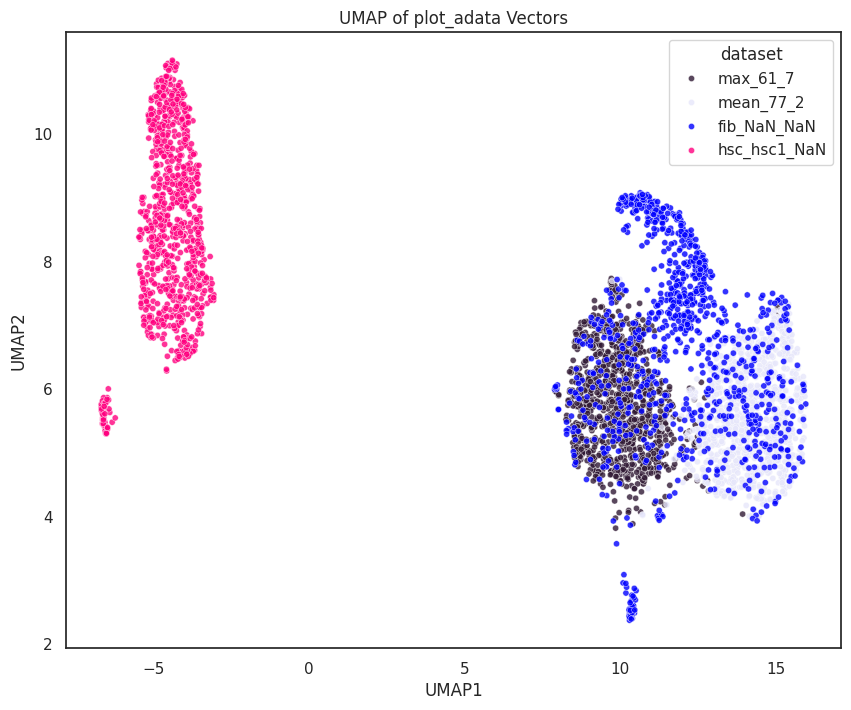

In [90]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the UMAP reducer
reducer = umap.UMAP(random_state=42)

# Fit and transform the data
umap_embedding = reducer.fit_transform(plot_adata.X)

# Create a new DataFrame for easy plotting
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['dataset'] = plot_adata.obs['dataset'].values

# Define custom colors with valid color names or hex codes
colors = {
    'max_61_7_min_61_9': '#301934',    # Dark purple
    'mean_77_2': '#E6E6FA',   # Lavender
    'hsc_hsc1_NaN': '#FF007F', # Bright pink
    'fib_NaN_NaN': '#0000FF'   # Blue
}

# Map the colors to the dataset column
umap_df['color'] = umap_df['dataset'].map(colors)

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='dataset',
    palette=colors,
    s=20,  # Size of points
    alpha=0.8  # Transparency for better visibility of overlapping points
)

# Set the title and labels
plt.title('UMAP of plot_adata Vectors')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Show the plot
plt.show()


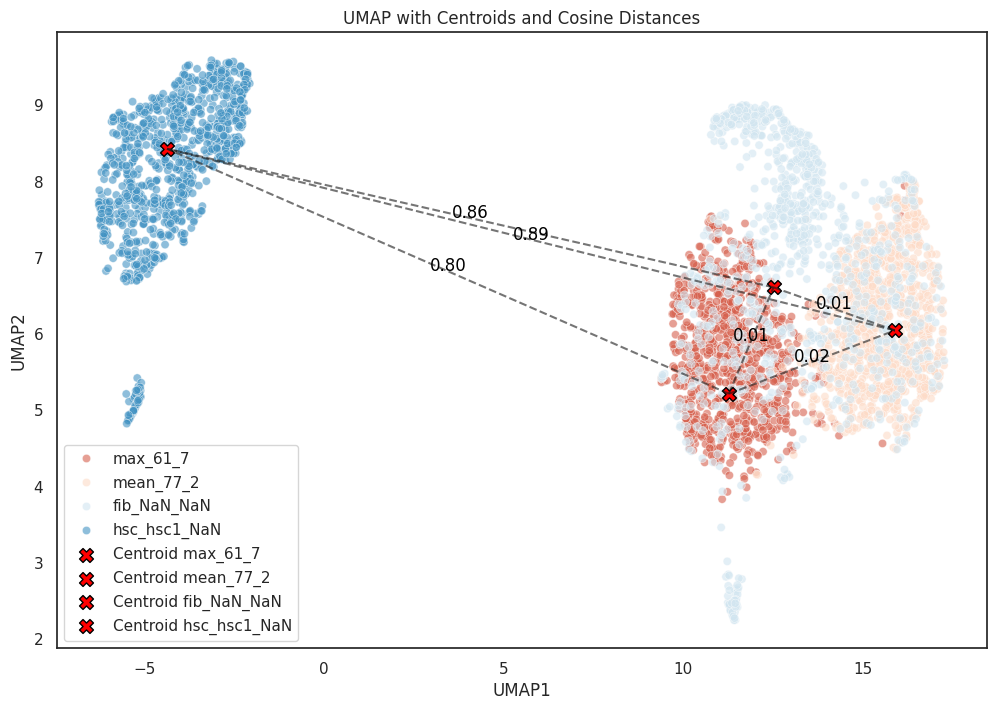

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances
import umap

# Ensure no duplicate indices in plot_adata.obs
plot_adata.obs = plot_adata.obs.reset_index(drop=True)

# 1. Calculate Centroids in High-Dimensional Space
def calculate_centroids(adata, dataset_name):
    data = adata[adata.obs['dataset'] == dataset_name].X
    return np.mean(data, axis=0)

datasets = ['max_61_7', 'mean_77_2', 'fib_NaN_NaN', 'hsc_hsc1_NaN']
centroids_high_dim = {dataset: calculate_centroids(plot_adata, dataset) for dataset in datasets}

# 2. Transform Centroids to UMAP Space
# Fit UMAP on the entire dataset to get the same UMAP transformation
umap_model = umap.UMAP()
umap_embedding = umap_model.fit_transform(plot_adata.X)

# Create a DataFrame for UMAP plot
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['dataset'] = plot_adata.obs['dataset']

# Project centroids to UMAP space
centroids_high_dim_matrix = np.array(list(centroids_high_dim.values()))
centroids_umap = umap_model.transform(centroids_high_dim_matrix)

# 3. Plot the UMAP
plt.figure(figsize=(12, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='dataset', palette='RdBu', alpha=0.6)

# Add centroid markers
centroid_labels = datasets
for i, dataset in enumerate(datasets):
    plt.scatter(centroids_umap[i, 0], centroids_umap[i, 1], marker='X', s=100, label=f'Centroid {dataset}', edgecolor='black', color='red')

# 4. Draw Lines Between Centroids and Compute Cosine Distances
distances = cosine_distances(centroids_high_dim_matrix)
for i, start in enumerate(datasets):
    for j, end in enumerate(datasets):
        if i < j:
            plt.plot([centroids_umap[i, 0], centroids_umap[j, 0]], [centroids_umap[i, 1], centroids_umap[j, 1]], 'k--', alpha=0.6)
            mid_point = [(centroids_umap[i, 0] + centroids_umap[j, 0]) / 2, (centroids_umap[i, 1] + centroids_umap[j, 1]) / 2]
            plt.text(mid_point[0], mid_point[1], f'{distances[i, j]:.2f}', color='black', ha='center')

# Add legend
plt.legend(loc='best')

# Set titles and labels
plt.title('UMAP with Centroids and Cosine Distances')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()


In [92]:
# Heatmap between mean_61_7 and hsc_hsc1_NaN datasets

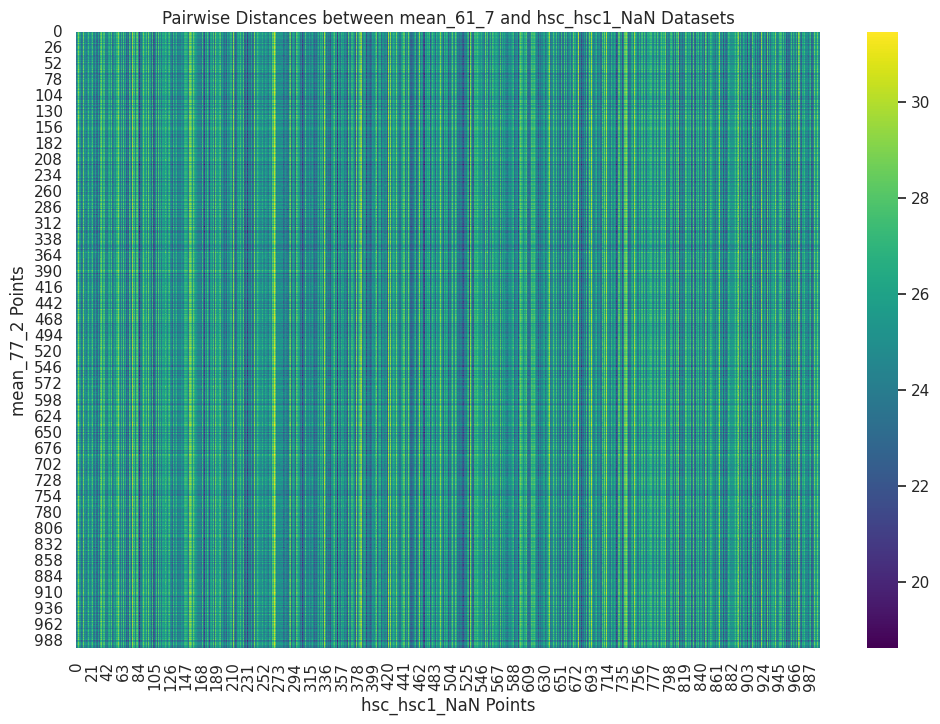

In [93]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Extract the relevant data points
mean_data = plot_adata[plot_adata.obs['dataset'] == 'mean_77_2'].X
hsc_data = plot_adata[plot_adata.obs['dataset'] == 'hsc_hsc1_NaN'].X

# Compute pairwise distances between the datasets
pairwise_distances = cdist(mean_data, hsc_data, metric='euclidean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pairwise_distances, cmap='viridis')
plt.title('Pairwise Distances between mean_61_7 and hsc_hsc1_NaN Datasets')
plt.xlabel('hsc_hsc1_NaN Points')
plt.ylabel('mean_77_2 Points')
plt.show()


In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, leaves_list

# List of datasets
datasets = ['fib_NaN_NaN', 'hsc_hsc1_NaN', 'max_61_7', 'mean_77_2']

# Initialize a list to hold data and labels
data_matrices = []
labels = []

# Extract data points for each dataset and store them
for dataset in datasets:
    data = plot_adata[plot_adata.obs['dataset'] == dataset].X
    data_matrices.append(data)
    labels.extend([dataset] * data.shape[0])

# Compute pairwise distances between all data points across datasets
pairwise_distances = cdist(np.vstack(data_matrices), np.vstack(data_matrices), metric='euclidean')

# Perform hierarchical clustering to reorder datasets
linked = linkage(pairwise_distances, method='average')
order = leaves_list(linked)

# Reorder the distance matrix and labels according to the clustering
ordered_distances = pairwise_distances[order, :][:, order]
ordered_labels = np.array(labels)[order]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ordered_distances, cmap='viridis', xticklabels=ordered_labels, yticklabels=ordered_labels)
plt.title('Pairwise Distances between Datasets')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()


/tmp/ipykernel_3285520/3797300124.py:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(pairwise_distances, method='average')


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x14e593e1f880> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, leaves_list

# List of datasets
datasets = ['fib_NaN_NaN', 'hsc_hsc1_NaN', 'max_61_7', 'mean_77_2']

# Initialize a list to hold data and labels
data_matrices = []
dataset_labels = []

# Extract data points for each dataset and store them
for dataset in datasets:
    data = plot_adata[plot_adata.obs['dataset'] == dataset].X
    data_matrices.append(data)
    dataset_labels.extend([dataset] * data.shape[0])

# Compute pairwise distances between all data points across datasets
pairwise_distances = cdist(np.vstack(data_matrices), np.vstack(data_matrices), metric='euclidean')

# Perform hierarchical clustering to reorder datasets
linked = linkage(pairwise_distances, method='average')
order = leaves_list(linked)

# Reorder the distance matrix and dataset labels according to the clustering
ordered_distances = pairwise_distances[order, :][:, order]
ordered_dataset_labels = np.array(dataset_labels)[order]

# Map minor labels to dataset names
unique_datasets = np.unique(ordered_dataset_labels)
axis_labels = []
for label in ordered_dataset_labels:
    for dataset in unique_datasets:
        if label == dataset:
            axis_labels.append(dataset)
            break

# Plot the heatmap without minor labels
plt.figure(figsize=(12, 10))
sns.heatmap(ordered_distances, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Pairwise Distances between Datasets')

# Set major ticks at the centers of each block of data points and label with dataset names
num_points = [np.sum(ordered_dataset_labels == dataset) for dataset in unique_datasets]
positions = np.cumsum([0] + num_points) - 0.5 * np.array(num_points)

plt.xticks(positions, unique_datasets, rotation=45, ha='right')
plt.yticks(positions, unique_datasets, rotation=0)

plt.xlabel('Dataset')
plt.ylabel('Dataset')
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# List of datasets
datasets = ['fib_NaN_NaN', 'hsc_hsc1_NaN', 'max_61_7', 'mean_77_2']

# Initialize a list to hold data and labels
data_matrices = []
dataset_labels = []

# Extract data points for each dataset and store them
for dataset in datasets:
    data = plot_adata[plot_adata.obs['dataset'] == dataset].X
    data_matrices.append(data)
    dataset_labels.extend([dataset] * data.shape[0])

# Compute pairwise distances between all data points across datasets
pairwise_distances = cdist(np.vstack(data_matrices), np.vstack(data_matrices), metric='euclidean')

# Convert the full distance matrix to a condensed distance matrix
condensed_distances = squareform(pairwise_distances)

# Perform hierarchical clustering to reorder datasets
linked = linkage(condensed_distances, method='average')
order = leaves_list(linked)

# Reorder the distance matrix and dataset labels according to the clustering
ordered_distances = pairwise_distances[order, :][:, order]
ordered_dataset_labels = np.array(dataset_labels)[order]

# Compute the number of points per dataset
unique_datasets, counts = np.unique(ordered_dataset_labels, return_counts=True)
num_datasets = len(unique_datasets)
positions = np.concatenate([[0], np.cumsum(counts)])

# Define positions for the ticks based on dataset block positions
tick_positions = positions[:-1] + np.diff(positions) / 2

# Plot the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(ordered_distances, cmap='viridis', xticklabels=False, yticklabels=False)

# Set major ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(unique_datasets, rotation=45, ha='right')
ax.set_yticks(tick_positions)
ax.set_yticklabels(unique_datasets, rotation=0)

plt.title('Pairwise Distances between Datasets')
plt.xlabel('Dataset')
plt.ylabel('Dataset')
plt.show()


## Fine Tuning the Distance UMAP

In [ ]:
#initial_adata is the fibroblasts
hsc_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/originals/hsc_1_use_this_copy.h5ad')
max_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_05-34-28_job_number_61.h5ad')
max_adata = max_adata[max_adata.obs['type'] == 'reprogrammed']
mean_adata = ad.read_h5ad('/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/8_14_originals_working/2024-07-31_06-34-03_job_number_77.h5ad')
mean_adata = mean_adata[mean_adata.obs['type'] == 'reprogrammed']
#cluster 9 of 61 seems to do the worst in recipe_diff and reprog_to_hsc.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances
import umap

# Ensure no duplicate indices in plot_adata.obs
plot_adata.obs = plot_adata.obs.reset_index(drop=True)

# 1. Calculate Centroids in High-Dimensional Space
def calculate_centroids(adata, dataset_name):
    data = adata[adata.obs['dataset'] == dataset_name].X
    return np.mean(data, axis=0)

datasets = ['max_61_7', 'mean_77_2', 'fib_NaN_NaN', 'hsc_hsc1_NaN']
centroids_high_dim = {dataset: calculate_centroids(plot_adata, dataset) for dataset in datasets}

# 2. Transform Centroids to UMAP Space
# Fit UMAP on the entire dataset to get the same UMAP transformation
umap_model = umap.UMAP()
umap_embedding = umap_model.fit_transform(plot_adata.X)

# Create a DataFrame for UMAP plot
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['dataset'] = plot_adata.obs['dataset']

# Project centroids to UMAP space
centroids_high_dim_matrix = np.array(list(centroids_high_dim.values()))
centroids_umap = umap_model.transform(centroids_high_dim_matrix)

# 3. Plot the UMAP
plt.figure(figsize=(12, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='dataset', palette='RdBu', alpha=0.6)

# Add centroid markers
centroid_labels = datasets
for i, dataset in enumerate(datasets):
    plt.scatter(centroids_umap[i, 0], centroids_umap[i, 1], marker='X', s=100, label=f'Centroid {dataset}', edgecolor='black', color='red')

# 4. Draw Lines Between Centroids and Compute Cosine Distances
distances = cosine_distances(centroids_high_dim_matrix)
for i, start in enumerate(datasets):
    for j, end in enumerate(datasets):
        if i < j:
            plt.plot([centroids_umap[i, 0], centroids_umap[j, 0]], [centroids_umap[i, 1], centroids_umap[j, 1]], 'k--', alpha=0.6)
            mid_point = [(centroids_umap[i, 0] + centroids_umap[j, 0]) / 2, (centroids_umap[i, 1] + centroids_umap[j, 1]) / 2]
            plt.text(mid_point[0], mid_point[1], f'{distances[i, j]:.2f}', color='black', ha='center')

# Add legend
plt.legend(loc='best')

# Set titles and labels
plt.title('UMAP with Centroids and Cosine Distances')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()
